In [ ]:
#importing ml libraries
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#uploading colab from local device
uploaded = [files.upload() for _ in range(2)]

Saving test.csv to test.csv


Saving train.csv to train.csv


In [ ]:
#Reading the uploaded file as a dataframe

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Datasets:

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting Data analysis:

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

Dealing With missing Values:

In [ ]:
#Any missing values:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

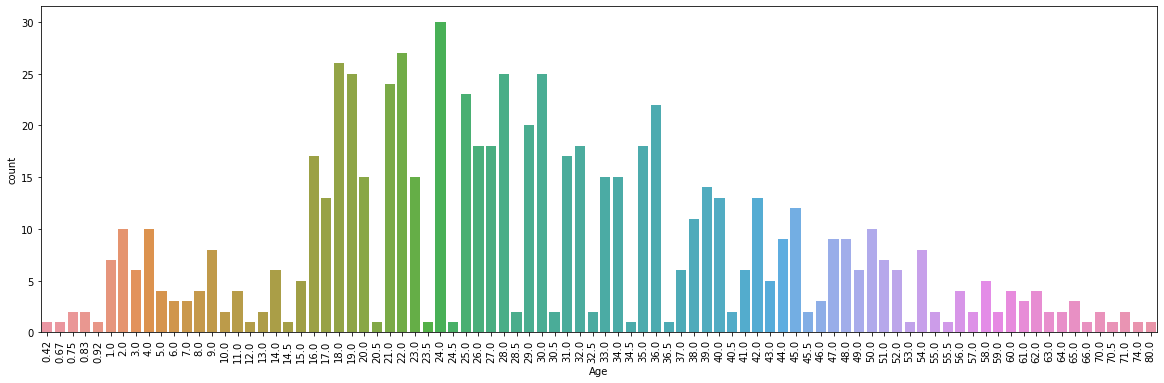

In [ ]:
#Drawing a boxplot to see what to do best with Age column
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.countplot(x="Age", data=train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#There is no outliner found in age. So, replaced it with mean value.
train.Age.fillna(train.Age.mean(),inplace=True)
train['Age'].mean()

29.699117647058763

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


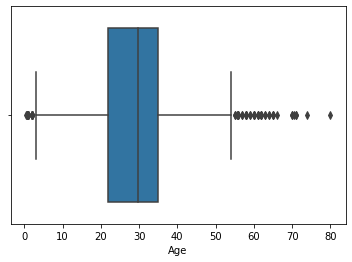

In [ ]:
sns.boxplot(train.Age)
#Don't know why boxplot are showing outliners

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#train['Embarked'].dropna()

In [ ]:
train.shape

(891, 12)

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#sns.FacetGrid(survived, hue="Sex",size=5).map(plt.scatter, "Age", "Fare" ).add_legend()

EDA:

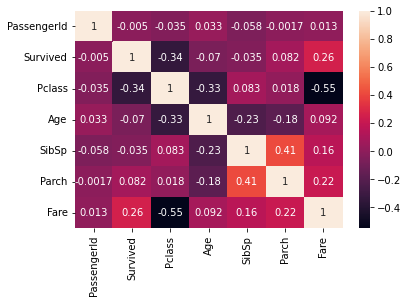

In [ ]:
corr = train.corr()
sns.heatmap(corr, annot=True)

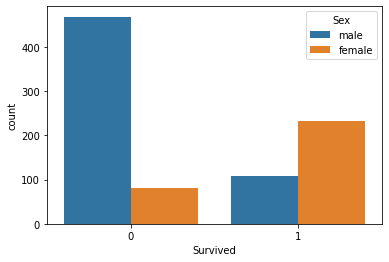

In [ ]:
ax = sns.countplot(x="Survived", hue="Sex", data=train)

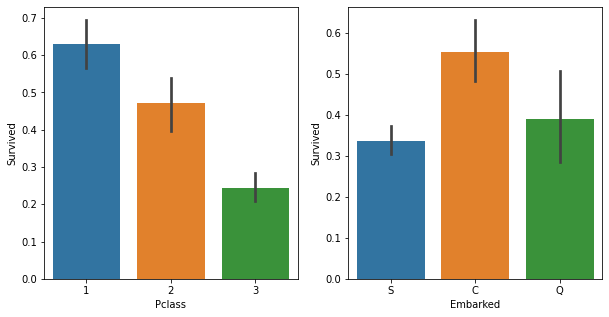

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(ax=axes[0], x='Pclass', y='Survived', data=train)
sns.barplot(ax=axes[1], x='Embarked', y='Survived', data=train)
fig.show()

Preprocessing the data:

In [ ]:
#Encoding the categorical variables & scaling the data
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
#Encoding categorical variables
Sex_Encode = LabelBinarizer()
p = Sex_Encode.fit_transform(train['Sex'])

#scaling the data
scaler = StandardScaler()
scaler.fit(np.array(train.Age).reshape(-1,1))
train.Age = scaler.transform(np.array(train.Age).reshape(-1,1))

scaler.fit(np.array(train.Fare).reshape(-1,1))
train.Fare = scaler.transform(np.array(train.Fare).reshape(-1,1))

X = train.loc[:,['Pclass', 'Age','SibSp','Parch','Fare']]
X['Sex'] = p
Y = train.loc[:, ['Survived']]

Building the model:

In [ ]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# separate the independent and target variable
'''
train_X = X.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']'''

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size=418,random_state=42)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((473, 6), (418, 6), (473, 1), (418, 1))

In [ ]:
lr = LogisticRegression()
model = lr.fit(train_x, train_y)

y_pred = lr.predict(test_x)

rf = RandomForestClassifier(n_estimators = 20, random_state = 42)
model_2 = rf.fit(train_x, train_y)
y_pred_2 = rf.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [ ]:
lr.score(test_x, test_y).round(4)

0.7967

In [ ]:
rf.score(test_x, test_y).round(4)

0.811

In [ ]:
con_mat = metrics.confusion_matrix(test_y, y_pred)
con_mat_2 = metrics.confusion_matrix(test_y, y_pred_2)

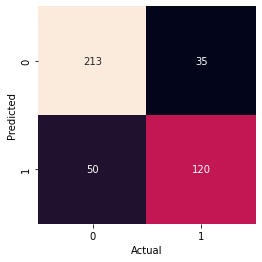

In [ ]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

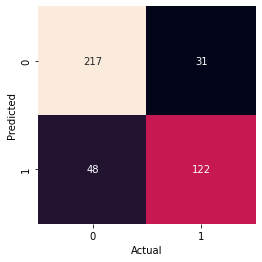

In [ ]:
sns.heatmap(con_mat_2, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
metrics.accuracy_score(test_y, y_pred).round(5)

0.79665

In [ ]:
metrics.accuracy_score(test_y, y_pred_2).round(5)

0.811